<a href="https://colab.research.google.com/github/Lakshmisripriyaputtamraju/codeway/blob/main/codeway_task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/spam.csv",encoding='ISO-8859-1')

In [ ]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.columns = ['label', 'message']

In [ ]:
df.shape

(5572, 2)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

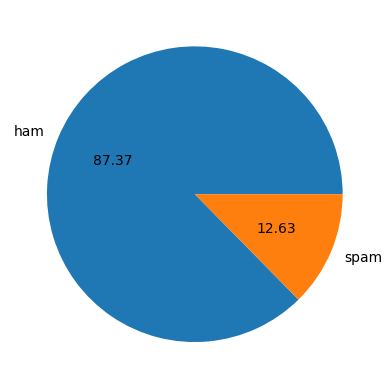

In [ ]:
colors = ['#1f77b4', '#ff7f0e']
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
import re
import string
from nltk import corpus
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in set(stopwords.words('english'))]
    cleaned_text = ' '.join(words)
    return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df1 = df.copy()
df1['message'] = df1['message'].apply(lambda x: preprocess_text(x))

In [ ]:
df1['label'] = df1['label'].map({'ham': 0, 'spam': 1})

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5169 non-null   int64 
 1   message  5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [ ]:
X = df1['message']
y = df1['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


In [ ]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
X_test_counts = vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_pred = clf.predict(X_test_tfidf)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(accuracy*100)

97.09864603481626


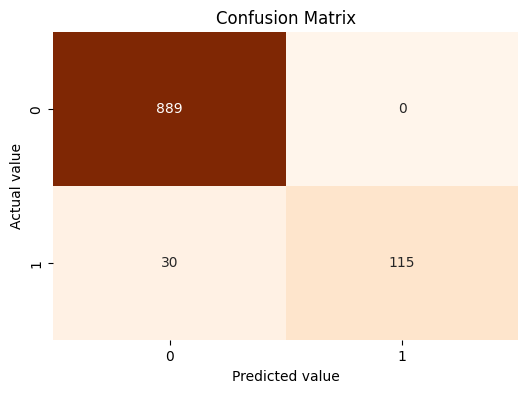

In [ ]:
conf_matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print('Classification Report:')

Classification Report:


In [ ]:
print(class_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       1.00      0.79      0.88       145

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [ ]:
input_mail = ["WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]
input_counts = vectorizer.transform(input_mail)
input_tfidf = tfidf_transformer.transform(input_counts)
prediction = clf.predict(input_tfidf)

In [ ]:
if prediction[0] == 0:
    result = "Ham"
else:
    result = "Spam"
print(f"Prediction: {result}")

Prediction: Spam


In [ ]:
input_mail = ["Congratulations on your recent achievement! Well done."]
input_counts = vectorizer.transform(input_mail)
input_tfidf = tfidf_transformer.transform(input_counts)
prediction = clf.predict(input_tfidf)
if prediction[0] == 0:
    result = "Ham"
else:
    result = "Spam"
print(f"Prediction: {result}")

Prediction: Ham
